In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import random

In [84]:
BASE_FILEPATH = './train/'
RANDOM_COUNT = 20
train_files = os.listdir('./train')
random_sample = random.sample(train_files,RANDOM_COUNT)
img = cv.imread(BASE_FILEPATH+random_sample[3])

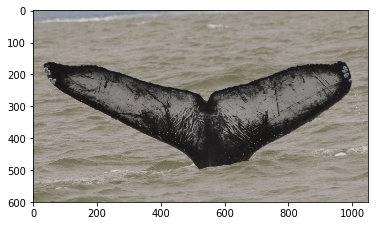

In [85]:
plt.imshow(img)

In [86]:
surf = cv.xfeatures2d.SIFT_create(900)
# graysca
kp, des = surf.detectAndCompute(img,None)

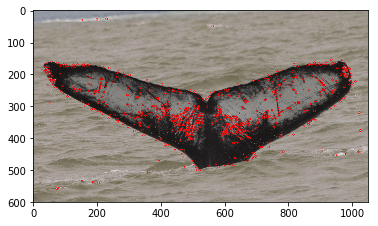

In [87]:
c = np.zeros(img.shape)
v = cv.drawKeypoints(img,kp,None,255)
plt.imshow(v)
# print(des)

In [88]:
BORDER = 10
for keypoint in kp:
    x , y = keypoint.pt
    y = int(y)
    x = int(x)
#     print(y,x)
    c[y-BORDER:y+BORDER,x-BORDER:x+BORDER,:] = 255

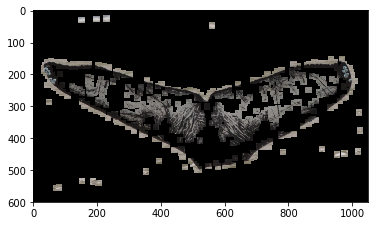

In [89]:
mask=c.astype('uint8')
# plt.imshow(mask)
plt.imshow(cv.bitwise_and(img,mask))

In [1]:
plt.imshow(mask)

NameError: name 'plt' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


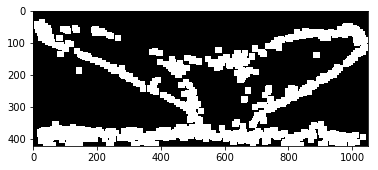

In [274]:
plt.imshow(c)

1766

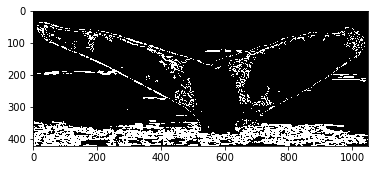

In [275]:
import matplotlib.cm as cmap
ed = cv.Canny(img,0,300,apertureSize = 3)
minLineLength = 5
maxLineGap = 1
lines = cv.HoughLinesP(ed,1,np.pi/180,100,minLineLength,maxLineGap)
new_img = np.zeros(ed.shape[:2])
for l in lines:
    for x1,y1,x2,y2 in l:
        cv.line(ed,(x1,y1),(x2,y2),(255,0,0),4)

plt.imshow(ed,cmap=cmap.gray)
len(lines)

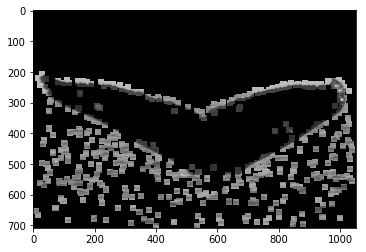

In [9]:
surf = cv.xfeatures2d.SIFT_create(900)
def get_surf_grid(img):
    kp, des = surf.detectAndCompute(img,None)
    c = np.zeros(img.shape)
    BORDER = 10
    for keypoint in kp:
        x , y = keypoint.pt
        y = int(y)
        x = int(x)
    #     print(y,x)
        c[y-BORDER:y+BORDER,x-BORDER:x+BORDER,:] = 255
        mask=c.astype('uint8')
    return cv.bitwise_and(img,mask)
plt.imshow(get_surf_grid(img))